In [1]:
!nvidia-smi

Sat Mar 23 02:50:11 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.39       Driver Version: 418.39       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    34W /  70W |    109MiB / 15079MiB |      5%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import gc
from os.path import join as pjoin
import os

In [3]:
from fastai.vision import ImageDataBunch,ImageList,get_transforms,models,cnn_learner,accuracy
from fastai.vision import *
import torch

In [26]:
os.listdir(train_log_dir)

['.ipynb_checkpoints']

In [22]:
# vars for model naming
train_log_dir = 'train_log'
model = 'resnet18'
os.makedirs(pjoin(train_log_dir,model))
version = 0
date = '1-1-1'




In [ ]:
f"""
Note for version {version}:
- Try new 
"""

In [4]:
path ='/home/qnkhuat/data/emotion_compilation_split'

In [5]:
tfms = get_transforms(do_flip=True,
                      flip_vert=False,
                      max_rotate=10,
                      max_zoom=1.1,
                     )
# train_tfm.extend([flip_lr(),skew(p=.5),rand_crop(p=.3)])
# valid_tfm = rand_crop(p=.5)

In [6]:
# ran this get erro in THcroe
data = (ImageDataBunch.from_folder(path,test='test',size=48,ds_tfms=tfms,bs=256)
       .normalize())

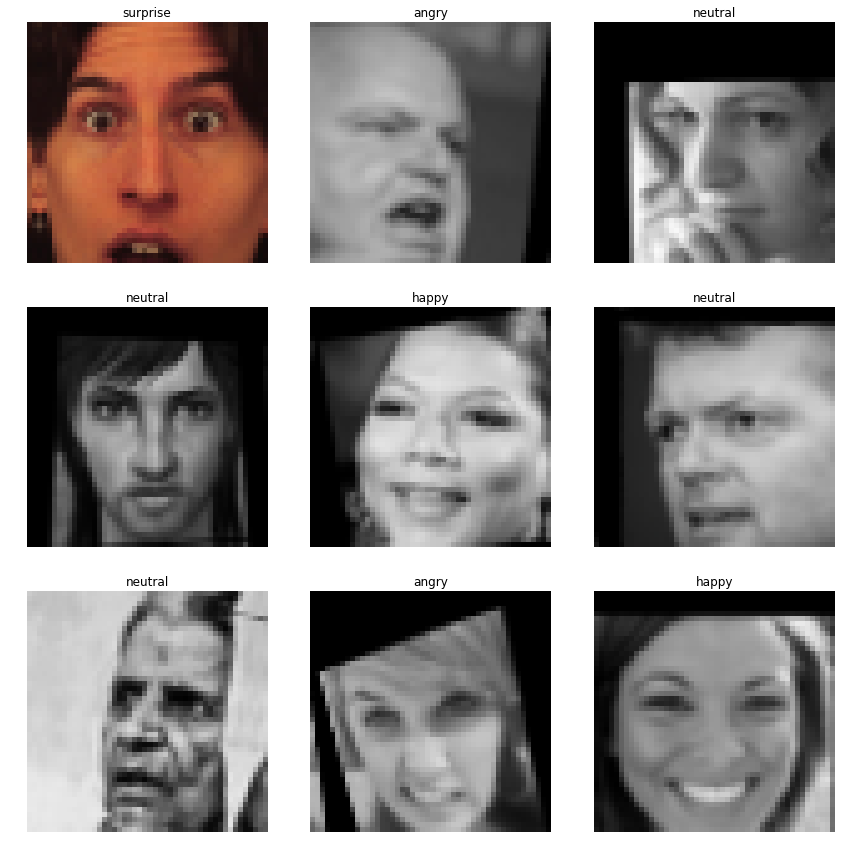

In [7]:
data.show_batch(rows=3)

In [8]:
learn = cnn_learner(data, models.resnet18)

In [9]:
learn.model_dir = '/home/qnkhuat/AI/vision/emotion_retrain/models'

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


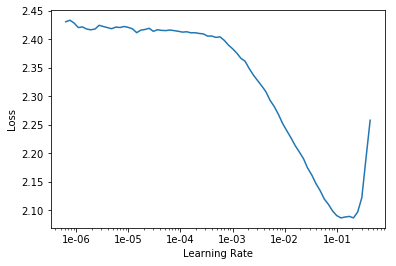

In [10]:
learn.lr_find()
learn.recorder.plot()

In [17]:
lr=5e-2

In [18]:
learn.metrics = [accuracy]

In [19]:
learn.fit(5,lr)

epoch,train_loss,valid_loss,accuracy,time
0,1.395099,1.182330,0.584304,00:14
1,1.256806,1.466093,0.490585,00:14
2,1.205277,1.108209,0.611902,00:14
3,1.138782,1.069679,0.634325,00:16
4,1.111421,1.190666,0.595515,00:14


In [20]:
learn.fit_one_cycle(12,slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.999320,0.874893,0.691677,00:14
1,0.993963,0.891247,0.690240,00:14
2,1.007648,0.983889,0.673710,00:15
3,1.026710,1.662842,0.668967,00:15
4,1.016716,0.914537,0.677447,00:15
5,0.991315,0.873348,0.698433,00:16
6,0.973313,0.819472,0.706770,00:14
7,0.946550,0.822659,0.708208,00:14
8,0.924323,0.804827,0.711657,00:14
9,0.900593,0.795952,0.715970,00:14


In [21]:
learn.fit(12,lr)

epoch,train_loss,valid_loss,accuracy,time
0,1.095511,0.983467,0.672273,00:15
1,1.122094,1.116520,0.623113,00:15
2,1.090746,0.965047,0.658905,00:14
3,1.056207,1.053447,0.612189,00:14
4,1.050751,0.932548,0.672991,00:14
5,1.030449,1.044040,0.624982,00:14
6,1.037175,0.934273,0.675722,00:16
7,1.033362,1.691487,0.640793,00:14
8,1.018835,1.068566,0.664223,00:14
9,1.024202,0.999480,0.637344,00:14


In [22]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


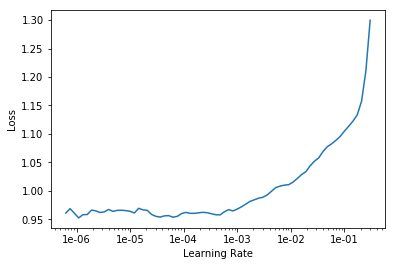

In [23]:
learn.lr_find()
learn.recorder.plot()

In [24]:
lr=1e-6

In [25]:
learn.fit_one_cycle(20,slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.968078,0.881006,0.693834,00:15
1,0.964887,0.870494,0.692827,00:17
2,0.965091,0.899886,0.693834,00:15
3,0.965849,0.859565,0.693690,00:15
4,0.967290,0.856586,0.693259,00:15
5,0.969932,0.897821,0.694552,00:16
6,0.974498,0.882395,0.695271,00:16
7,0.969630,0.883484,0.694552,00:15
8,0.955531,0.855141,0.695990,00:15
9,0.969665,0.912105,0.693977,00:15


In [ ]:
learn.fit(50,lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.945788,0.882962,0.697715,00:14
1,0.942421,0.888427,0.699583,00:15
2,0.939188,0.897974,0.701164,00:15
3,0.934843,0.847418,0.702889,00:16
4,0.937300,0.873017,0.703464,00:15
5,0.934946,0.848102,0.702458,00:15
6,0.928299,0.825596,0.705045,00:15
7,0.931590,0.875170,0.704902,00:15
8,0.918096,0.887551,0.706051,00:17
9,0.926018,0.820130,0.707345,00:15


In [ ]:
learn.freeze()

In [ ]:
learn.fit_one_cycle(12)

In [ ]:
learn.fit(30,lr=10e-6)

In [65]:
learn.save('resnet18_22_3_10_79.6.pth')

In [55]:
#learn.fit(10,lr=10e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.721224,0.696522,0.755067,00:15
1,0.669220,0.751952,0.721432,00:15
2,0.652717,0.666329,0.749030,00:17
3,0.618793,0.629089,0.776484,00:16
4,0.596754,0.614895,0.782521,00:16
5,0.586281,0.605672,0.775765,00:17
6,0.563803,0.611629,0.778640,00:17
7,0.551235,0.626276,0.771022,00:16
8,0.524861,0.688259,0.760098,00:16
9,0.510898,0.607218,0.778784,00:16


In [22]:
learn.freeze()

In [23]:
learn.fit(3,lr=10e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.573903,0.585458,0.788127,00:15
1,0.572768,0.584008,0.787696,00:16
2,0.565022,0.584421,0.787552,00:16


In [24]:
learn.fit(5,lr=10e-5)

epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: 

In [62]:
learn.save('resnet18_22_3_10_80.8.pth')

In [ ]:
{notebook_name}

In [ ]:
os.system(f'jupyter nbconvert --to html yourNotebook.ipynb{notebook_name}')